In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df=pd.read_csv('business.retailsales.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1775 entries, 0 to 1774
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product Type     1767 non-null   object 
 1   Net Quantity     1775 non-null   int64  
 2   Gross Sales      1775 non-null   float64
 3   Discounts        1775 non-null   float64
 4   Returns          1775 non-null   float64
 5   Total Net Sales  1775 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 83.3+ KB


In [5]:
df.describe()

,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales
count,1775.000000,1775.000000,1775.000000,1775.000000,1775.000000
mean,3.712676,199.671746,-6.317623,-5.385437,187.968687
std,6.243078,464.880638,20.903517,46.654269,414.547039
min,-1.000000,0.000000,-594.000000,-1609.000000,-106.250000
25%,1.000000,48.000000,-6.000000,0.000000,44.800000
50%,2.000000,100.000000,0.000000,0.000000,96.000000
75%,4.000000,185.500000,0.000000,0.000000,184.750000
max,96.000000,14935.000000,0.000000,0.000000,12732.000000


In [6]:
df.dropna()

,Product Type,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales
0,Art & Sculpture,34,14935.0,-594.00,-1609.00,12732.00
1,Basket,13,3744.0,-316.80,0.00,3427.20
2,Basket,12,3825.0,-201.60,-288.00,3335.40
3,Basket,17,3035.0,-63.25,0.00,2971.75
4,Art & Sculpture,47,2696.8,-44.16,0.00,2652.64
...,...,...,...,...,...,...
1770,Kitchen,0,28.0,-2.81,-25.19,0.00
1771,Jewelry,0,28.0,0.00,-28.00,0.00
1772,Basket,0,116.0,-23.20,-92.80,0.00
1773,Kitchen,0,16.5,0.00,-16.50,0.00


In [7]:
sales = df.groupby('Product Type').sum().sort_values('Gross Sales').reset_index()
sales

,Product Type,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales
0,Gift Baskets,1,19.50,0.00,0.00,19.50
1,Easter,1,38.00,-3.80,0.00,34.20
2,Textiles,43,1889.00,-112.90,-97.00,1679.10
3,Furniture,27,2034.00,-169.04,0.00,1864.96
4,One-of-a-Kind,12,2180.00,-71.99,0.00,2108.01
5,Fair Trade Gifts,110,2258.00,-53.33,0.00,2204.67
6,Skin Care,101,2609.50,-37.70,0.00,2571.80
7,Music,98,2643.50,-82.19,-142.41,2418.90
8,Recycled Art,99,3792.80,-88.64,0.00,3704.16
9,Kids,140,3838.00,-116.66,0.00,3721.34


array([[<AxesSubplot:title={'center':'Net Quantity'}>,
        <AxesSubplot:title={'center':'Gross Sales'}>],
       [<AxesSubplot:title={'center':'Discounts'}>,
        <AxesSubplot:title={'center':'Returns'}>],
       [<AxesSubplot:title={'center':'Total Net Sales'}>, <AxesSubplot:>]],
      dtype=object)

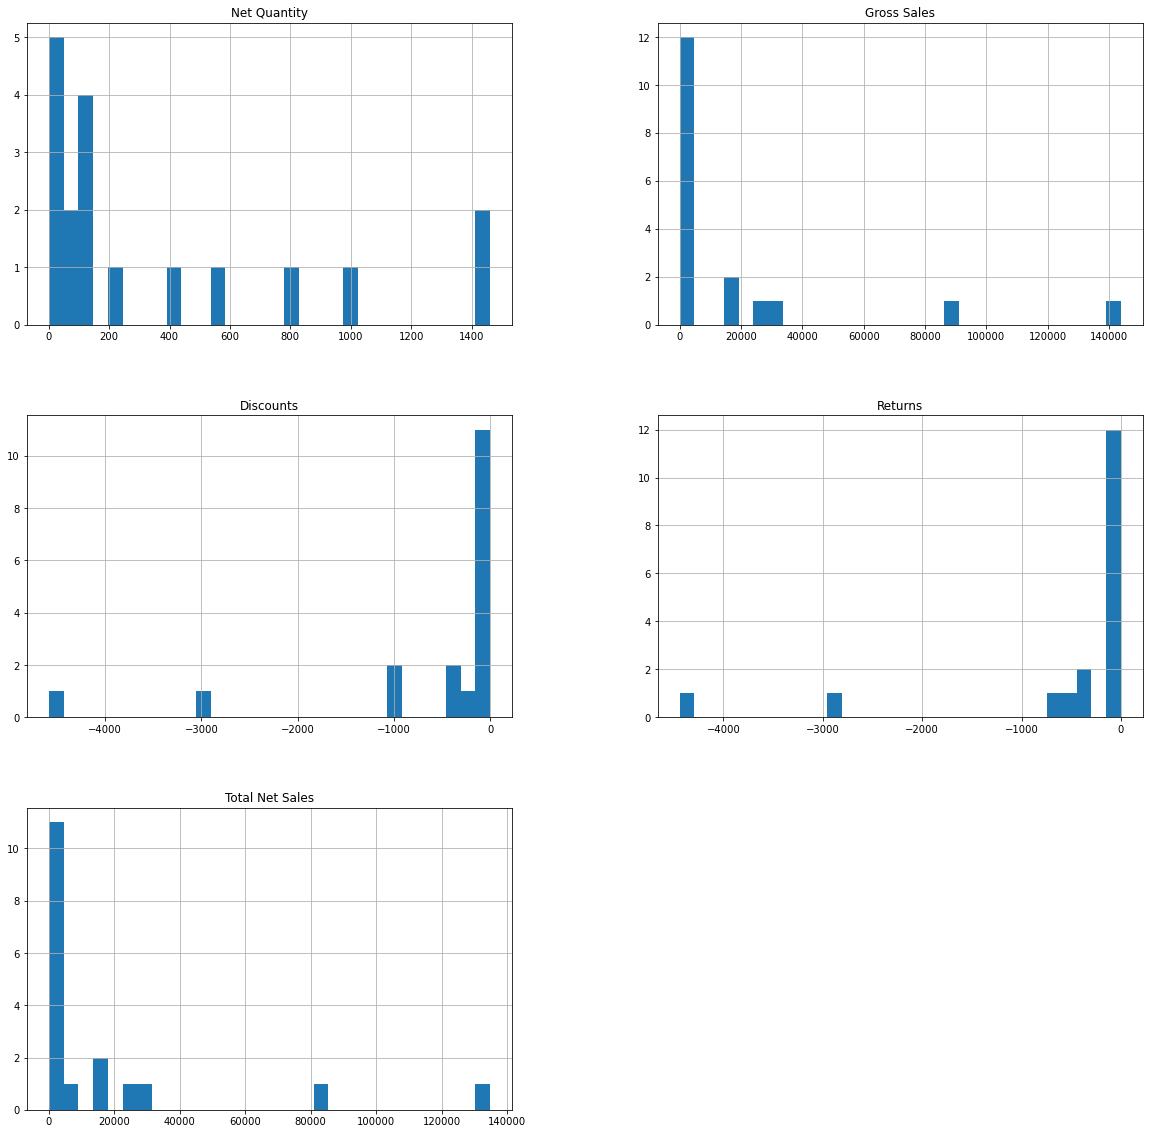

In [8]:
sales.hist(bins=30, figsize=(20,20))

Text(0.5, 1.0, 'total sales of different types of products')

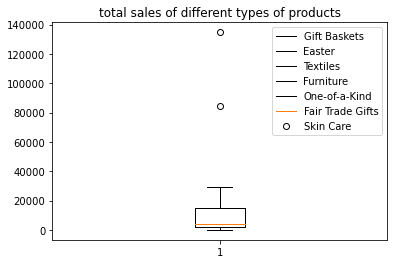

In [9]:
y=sales['Total Net Sales']
x=sales[ 'Product Type']
plt.boxplot(y)
plt.legend(x)
plt.title("total sales of different types of products")



Text(0.5, 1.0, 'distribution of netsales according to the product type')

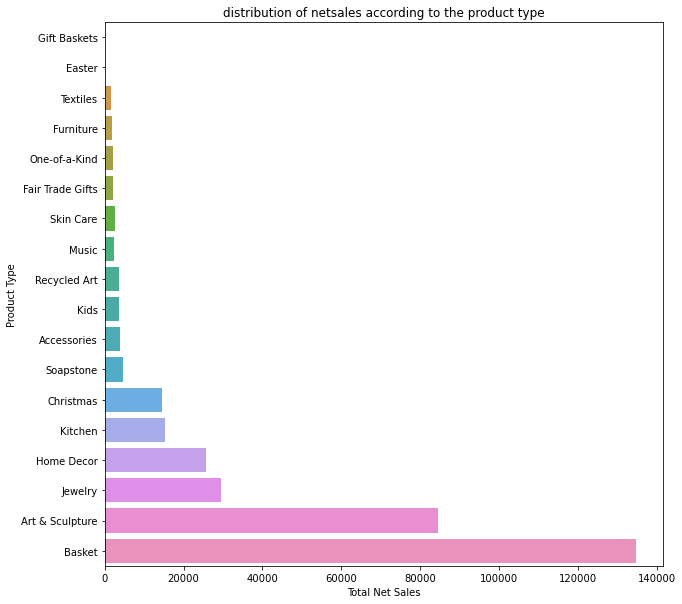

In [11]:
x=sales['Total Net Sales']
y=sales['Product Type']
sns.barplot(x=x,y=y)
plt.rcParams["figure.figsize"]=(10,10)
plt.title("distribution of netsales according to the product type")

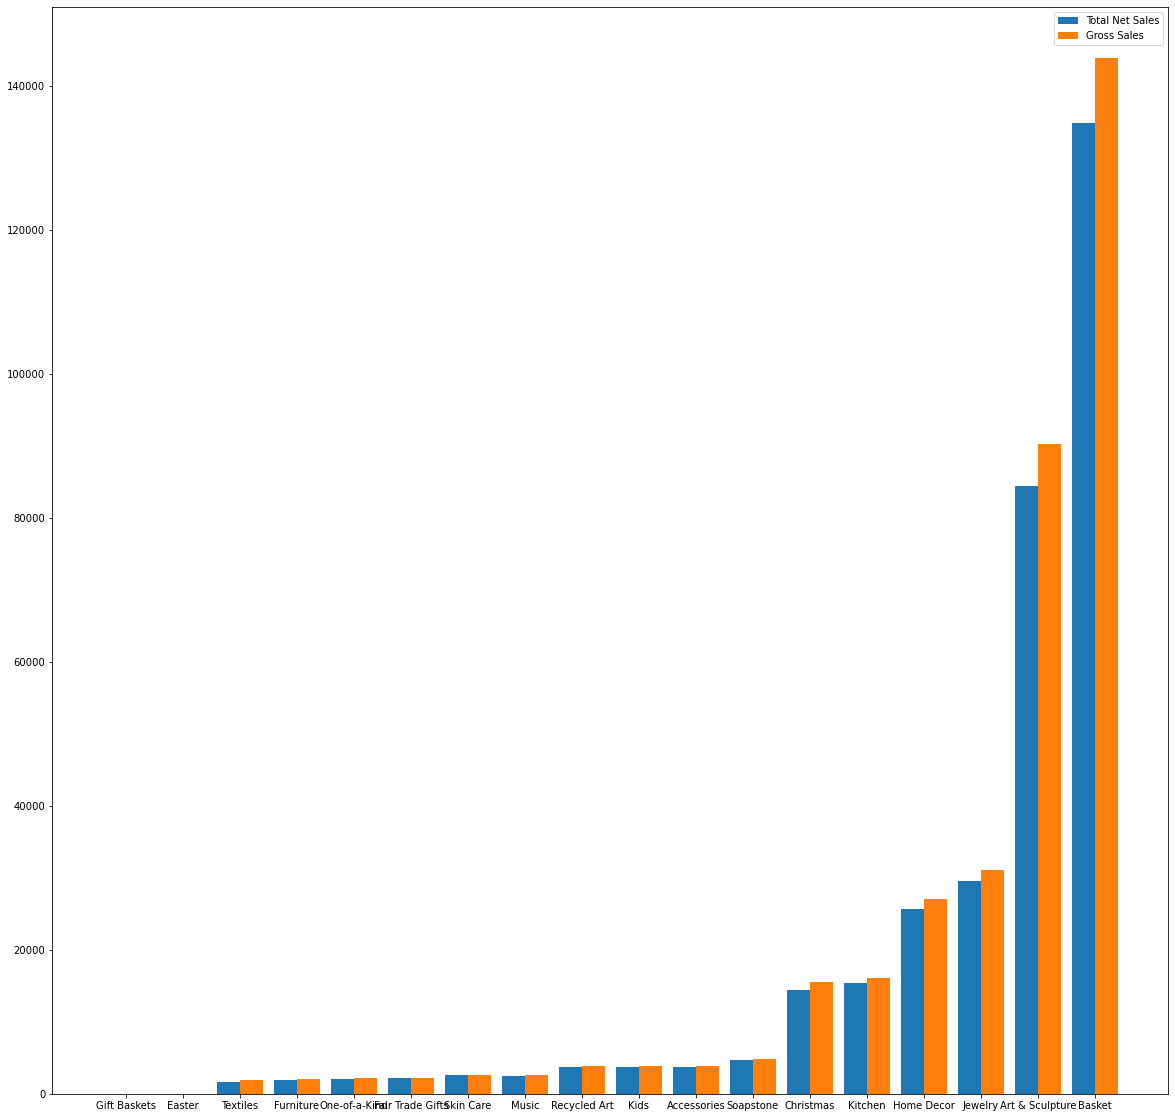

In [13]:
products=sales['Product Type']
x_axis = np.arange(len(products))
x=sales['Total Net Sales']
y=sales['Gross Sales']
plt.bar(x_axis -0.2,x, width=0.4, label = 'Total Net Sales')
plt.bar(x_axis +0.2,y , width=0.4, label = 'Gross Sales')
plt.xticks(x_axis, products)
plt.legend()
plt.show()
plt.rcParams["figure.figsize"]=(20,20)




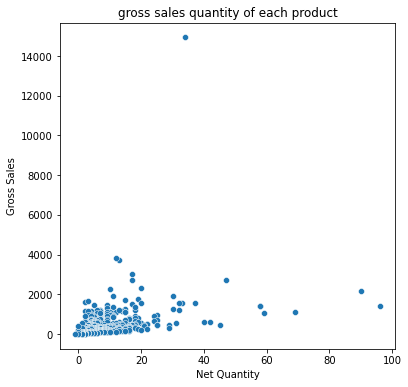

In [15]:
x=df['Net Quantity']
y=df['Gross Sales']
sns.scatterplot(x=x,y=y)
plt.title('gross sales quantity of each product')
plt.rcParams["figure.figsize"]=(6,6)


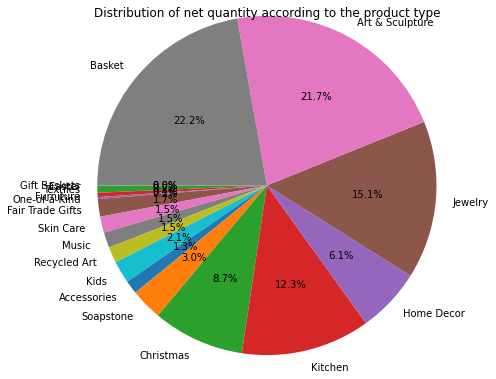

In [16]:
y=sales['Product Type']
x=sales['Net Quantity']
plt.pie(x,labels = y,startangle=180,autopct='%.1f%%',radius=1.3)
plt.title("Distribution of net quantity according to the product type")
plt.show()

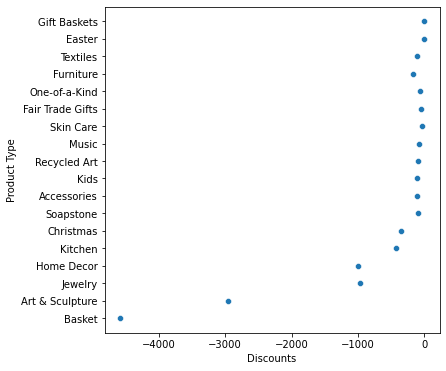

In [17]:
y=sales['Product Type']
x=sales['Discounts']
sns.scatterplot(x=x,y=y)
plt.rcParams['figure.figsize'] = [5,5]

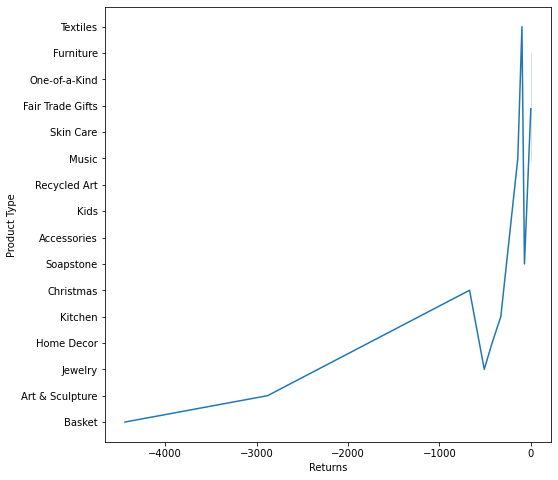

In [38]:
y=sales['Product Type']
x=sales['Returns']
sns.lineplot(x=x,y=y)
plt.rcParams['figure.figsize'] = [10,7]

In [39]:
table1=pd.pivot_table(df,values=['Net Quantity','Total Net Sales'],index=['Product Type'],aggfunc=np.sum)
table1

,Net Quantity,Total Net Sales
Product Type,,
Accessories,84,3785.38
Art & Sculpture,1427,84480.85
Basket,1461,134791.39
Christmas,575,14460.81
Easter,1,34.20
Fair Trade Gifts,110,2204.67
Furniture,27,1864.96
Gift Baskets,1,19.50
Home Decor,404,25699.99


In [20]:
table1.head()

,Net Quantity,Total Net Sales
Product Type,,
Accessories,84,3785.38
Art & Sculpture,1427,84480.85
Basket,1461,134791.39
Christmas,575,14460.81
Easter,1,34.20


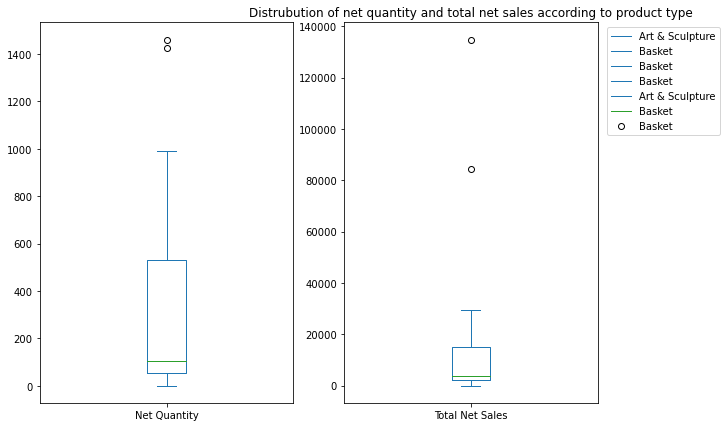

In [21]:
x=df['Product Type']
table1.plot(kind="box",subplots=True)
plt.legend(x,bbox_to_anchor=(1.5, 1))
plt.title('Distrubution of net quantity and total net sales according to product type',loc='center')
plt.rcParams['figure.figsize'] = [12,12]

In [22]:
z=df.groupby('Product Type')['Total Net Sales'].mean()
z

Product Type
Accessories          97.061026
Art & Sculpture     250.685015
Basket              244.630472
Christmas           198.093288
Easter               34.200000
Fair Trade Gifts     78.738214
Furniture           116.560000
Gift Baskets         19.500000
Home Decor          196.183130
Jewelry             140.823571
Kids                 59.068889
Kitchen              95.259752
Music                83.410345
One-of-a-Kind       175.667500
Recycled Art        161.050435
Skin Care           233.800000
Soapstone            69.090896
Textiles            119.935714
Name: Total Net Sales, dtype: float64

Text(0.5, 1.0, 'netsales vs meansales of different products')

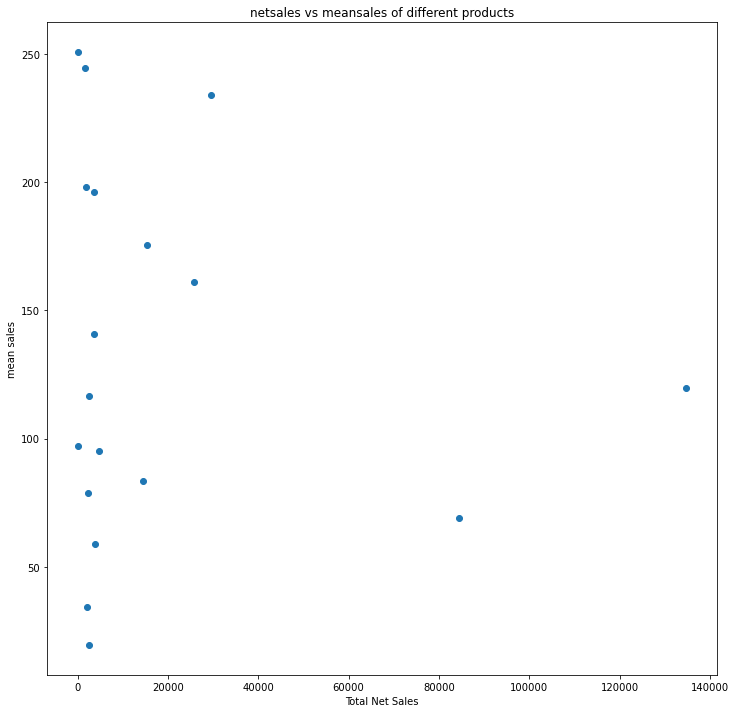

In [23]:
z=df.groupby('Product Type')['Total Net Sales'].mean()
z
y=sales['Total Net Sales']
len(y)
k=sales['Product Type']
plt.scatter(x=y,y=z)
plt.rcParams['figure.figsize'] = [8,8]
plt.xlabel('Total Net Sales')
plt.ylabel('mean sales')
plt.title('netsales vs meansales of different products')

In [32]:
table2=pd.pivot_table(df,values=['Gross Sales','Total Net Sales'],index=['Product Type'],aggfunc=np.sum)
table2

,Gross Sales,Total Net Sales
Product Type,,
Accessories,3892.40,3785.38
Art & Sculpture,90316.60,84480.85
Basket,143815.50,134791.39
Christmas,15476.00,14460.81
Easter,38.00,34.20
Fair Trade Gifts,2258.00,2204.67
Furniture,2034.00,1864.96
Gift Baskets,19.50,19.50
Home Decor,27114.55,25699.99


In [37]:
table3=pd.pivot_table(df,values=['Discounts'],index=['Product Type'],aggfunc=np.sum)
table3

,Discounts
Product Type,
Accessories,-107.02
Art & Sculpture,-2955.82
Basket,-4584.42
Christmas,-345.19
Easter,-3.80
Fair Trade Gifts,-53.33
Furniture,-169.04
Gift Baskets,0.00
Home Decor,-991.21
